# Fetal health data, Analyse exploratoire:


In [19]:
# Installation automatique des packages manquants (si nécessaire)
required_packages <- c("ggplot2", "dplyr", "corrplot", "gridExtra", 
                       "FactoMineR", "factoextra", "cluster", "class", 
                       "e1071", "MASS", "rpart", "randomForest", 
                       "caret", "pROC", "nnet", "mclust", "rpart.plot")

# Vérifier les packages installés
installed <- installed.packages()[,"Package"]
new_packages <- required_packages[!(required_packages %in% installed)]

if(length(new_packages) > 0) {
  cat("Installation des packages manquants:", paste(new_packages, collapse=", "), "\n")
  
  # Installer d'abord les dépendances critiques si nécessaire
  critical_deps <- c("Hmisc")
  missing_deps <- critical_deps[!(critical_deps %in% installed)]
  if(length(missing_deps) > 0) {
    cat("Installation des dépendances critiques:", paste(missing_deps, collapse=", "), "\n")
    tryCatch({
      install.packages(missing_deps, repos = "https://cran.rstudio.com/", type = "binary")
    }, error = function(e) {
      cat("Note: Certaines dépendances n'ont pas pu être installées automatiquement.\n")
    })
  }
  
  # Installer les packages principaux (forcer les versions binaires sur Windows)
  for(pkg in new_packages) {
    cat("Installation de", pkg, "...\n")
    tryCatch({
      # Essayer d'abord avec les binaires
      install.packages(pkg, repos = "https://cran.rstudio.com/", type = "binary", dependencies = TRUE)
      cat("✓", pkg, "installé avec succès\n")
    }, error = function(e) {
      # Si échec, essayer depuis les sources
      cat("Tentative d'installation depuis les sources pour", pkg, "...\n")
      tryCatch({
        install.packages(pkg, repos = "https://cran.rstudio.com/", type = "source", dependencies = TRUE)
        cat("✓", pkg, "installé depuis les sources\n")
      }, error = function(e2) {
        cat("✗ Erreur lors de l'installation de", pkg, ":", e2$message, "\n")
        cat("  Vous devrez peut-être installer Rtools pour compiler ce package.\n")
        cat("  Téléchargez Rtools depuis: https://cran.r-project.org/bin/windows/Rtools/\n")
      })
    })
  }
  cat("\nInstallation terminée!\n\n")
} else {
  cat("Tous les packages sont déjà installés!\n\n")
}

# Chargement des bibliothèques nécessaires
library(ggplot2)
library(dplyr)
library(corrplot)
library(gridExtra)
library(FactoMineR)
library(factoextra)
library(cluster)
library(class)
library(e1071)
library(MASS)
library(rpart)
library(randomForest)
library(caret)
library(pROC)
library(nnet)
library(mclust)
library(rpart.plot)

# Chargement du dataset
path <- "fetal_health.csv"
df <- read.csv(path)

# Nettoyage des noms de colonnes (remplacer les espaces par des underscores)
names(df) <- gsub(" ", "_", names(df))
names(df) <- gsub("\\.", "_", names(df))

# Aperçu des données
head(df)
cat("\nInfos sur le dataset :\n")
str(df)
cat("\nStatistiques descriptives :\n")
summary(df)


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

Tous les packages sont déjà installés!



,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,120,0.000,0,0.000,0.000,0,0.000,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
2,132,0.006,0,0.006,0.003,0,0.000,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
3,133,0.003,0,0.008,0.003,0,0.000,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
4,134,0.003,0,0.008,0.003,0,0.000,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
5,132,0.007,0,0.008,0.000,0,0.000,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
6,134,0.001,0,0.010,0.009,0,0.002,26,5.9,0,...,50,200,5,3,76,107,107,170,0,3



Infos sur le dataset :
'data.frame':	2126 obs. of  22 variables:
 $ baseline_value                                        : num  120 132 133 134 132 134 134 122 122 122 ...
 $ accelerations                                         : num  0 0.006 0.003 0.003 0.007 0.001 0.001 0 0 0 ...
 $ fetal_movement                                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ uterine_contractions                                  : num  0 0.006 0.008 0.008 0.008 0.01 0.013 0 0.002 0.003 ...
 $ light_decelerations                                   : num  0 0.003 0.003 0.003 0 0.009 0.008 0 0 0 ...
 $ severe_decelerations                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ prolongued_decelerations                              : num  0 0 0 0 0 0.002 0.003 0 0 0 ...
 $ abnormal_short_term_variability                       : num  73 17 16 16 16 26 29 83 84 86 ...
 $ mean_value_of_short_term_variability                  : num  0.5 2.1 2.1 2.4 2.4 5.9 6.3 0.5 0.5 0.3 ...
 $ percen

 baseline_value  accelerations      fetal_movement     uterine_contractions
 Min.   :106.0   Min.   :0.000000   Min.   :0.000000   Min.   :0.000000    
 1st Qu.:126.0   1st Qu.:0.000000   1st Qu.:0.000000   1st Qu.:0.002000    
 Median :133.0   Median :0.002000   Median :0.000000   Median :0.004000    
 Mean   :133.3   Mean   :0.003178   Mean   :0.009481   Mean   :0.004366    
 3rd Qu.:140.0   3rd Qu.:0.006000   3rd Qu.:0.003000   3rd Qu.:0.007000    
 Max.   :160.0   Max.   :0.019000   Max.   :0.481000   Max.   :0.015000    
 light_decelerations severe_decelerations prolongued_decelerations
 Min.   :0.000000    Min.   :0.000e+00    Min.   :0.0000000       
 1st Qu.:0.000000    1st Qu.:0.000e+00    1st Qu.:0.0000000       
 Median :0.000000    Median :0.000e+00    Median :0.0000000       
 Mean   :0.001889    Mean   :3.293e-06    Mean   :0.0001585       
 3rd Qu.:0.003000    3rd Qu.:0.000e+00    3rd Qu.:0.0000000       
 Max.   :0.015000    Max.   :1.000e-03    Max.   :0.0050000       

## Synthèse des données brutes

- Les `2126` tracés cardiotocographiques couvrent `21` variables explicatives normalisées plus la cible `fetal_health`. Aucune valeur manquante n'est détectée et les ordres de grandeur varient fortement (ex. `baseline_value` autour de 120 bpm vs. proportions comprises entre 0 et 1), ce qui justifie la standardisation ultérieure.
- Les statistiques descriptives confirment des distributions asymétriques pour les décélérations et les mouvements fœtaux (médianes à 0), laissant présager des variables très informatives lorsqu'elles sortent de la normale.
- Ces premières observations indiquent qu'une phase de mise à l'échelle et une attention particulière aux variables rares seront essentielles pour stabiliser les modèles probabilistes (Naive Bayes, LDA/QDA) et les méthodes basées sur les distances (KNN, clustering).




Pourcentages par classe :



        1         2         3 
77.845720 13.875823  8.278457 

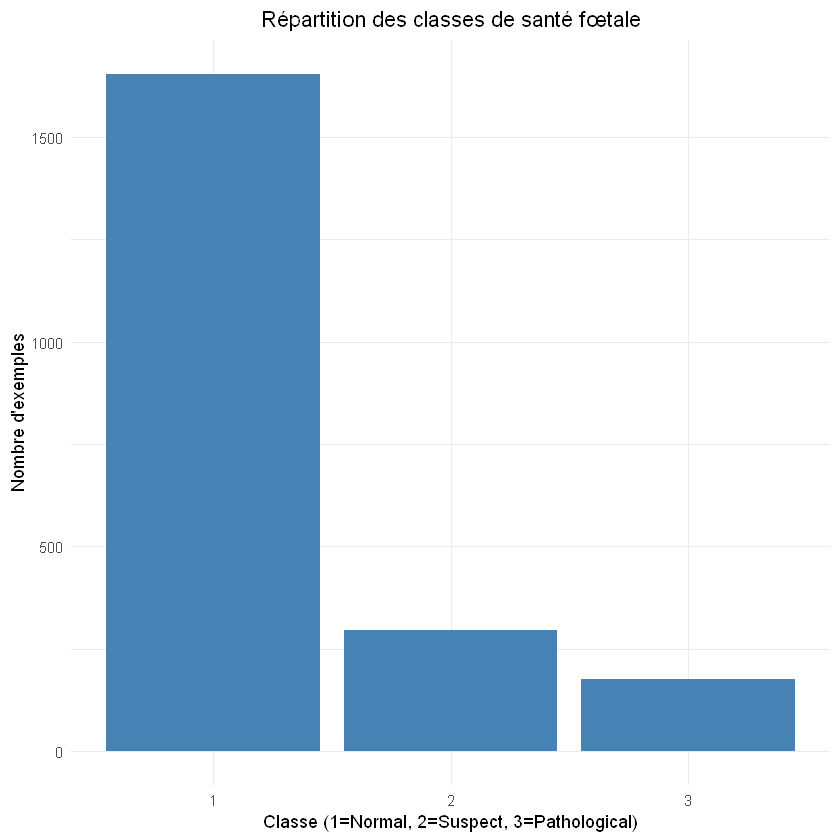

In [20]:
# Répartition de la variable cible (santé fœtale)
ggplot(df, aes(x = factor(fetal_health))) +
  geom_bar(fill = "steelblue") +
  labs(title = "Répartition des classes de santé fœtale",
       x = "Classe (1=Normal, 2=Suspect, 3=Pathological)",
       y = "Nombre d'exemples") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

# Déséquilibre des classes à prendre en compte pour la modélisation
cat("\nPourcentages par classe :\n")
prop.table(table(df$fetal_health)) * 100


## Interprétation de la répartition des classes

- La classe `1-Normal` représente près de 78 % des observations, alors que `2-Suspect` et `3-Pathological` totalisent respectivement ~14 % et ~8 %. Ce déséquilibre impose l'usage de métriques pondérées (balanced accuracy, rappel macro) et éventuellement de techniques de pondération des erreurs.
- Les modèles linéaires et probabilistes risquent de se concentrer sur la majorité si l'on ne surveille pas le rappel sur les classes minoritaires. Les arbres et forêts, insensibles aux mises à l'échelle mais sensibles au poids des classes, devront être évalués sur leurs performances spécifiques pour les cas suspects/pathologiques.



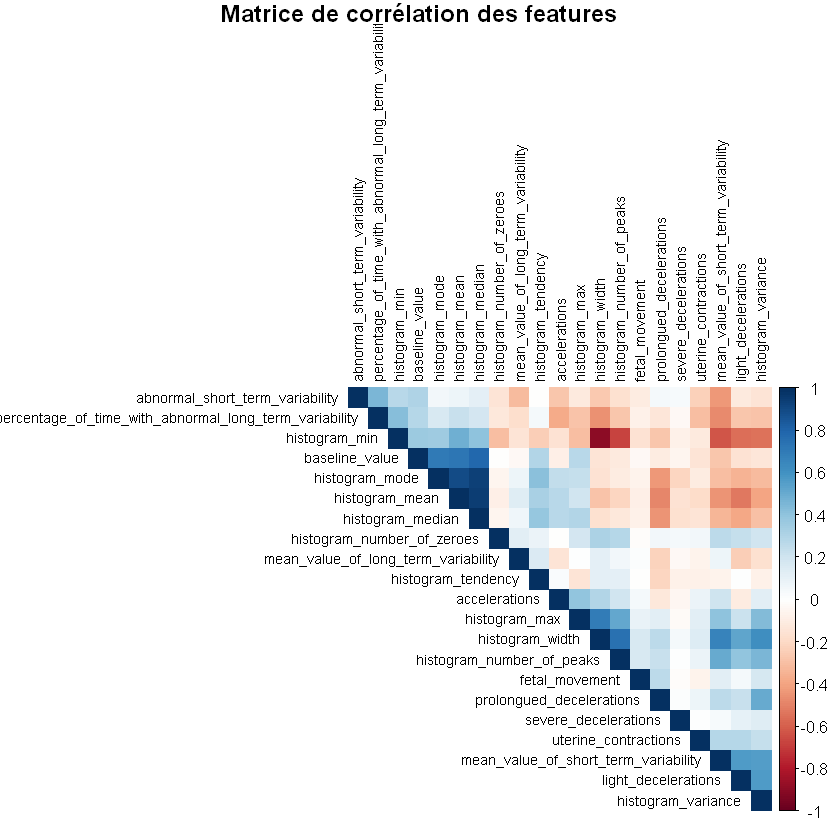

In [21]:
# Matrice de corrélation
corr_matrix <- cor(df[, -which(names(df) == "fetal_health")])
corrplot(corr_matrix, method = "color", type = "upper", 
         order = "hclust", tl.cex = 0.7, tl.col = "black",
         title = "Matrice de corrélation des features",
         mar = c(0,0,1,0))


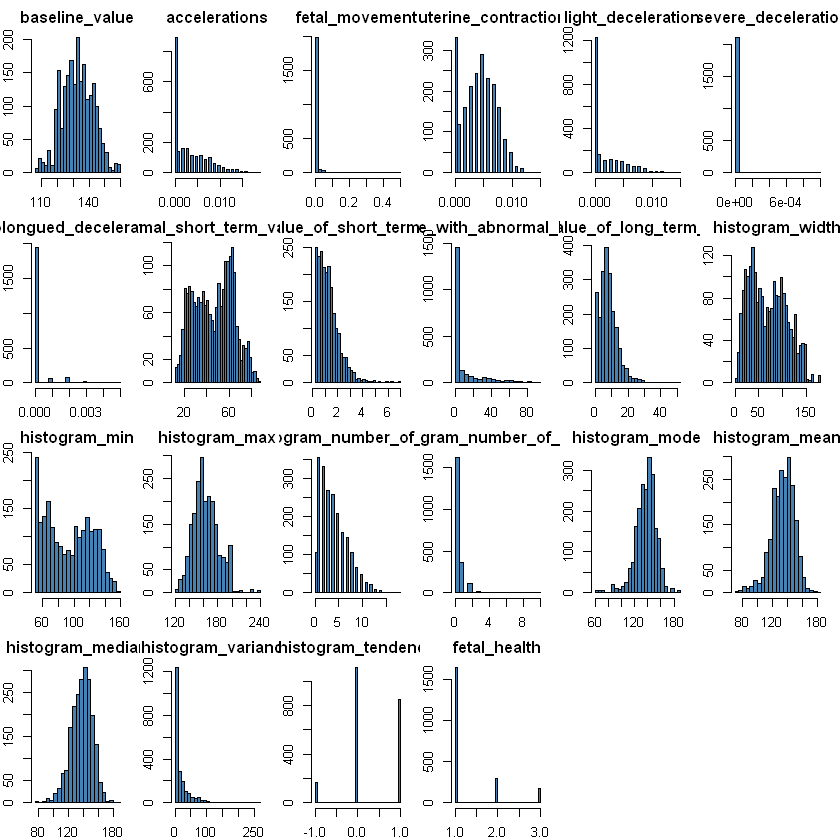

In [22]:
# Distribution de toutes les variables
df_numeric <- df[, sapply(df, is.numeric)]
par(mfrow = c(4, 6), mar = c(2, 2, 2, 1))
for (col in names(df_numeric)) {
  hist(df_numeric[[col]], main = col, xlab = "", breaks = 30, col = "steelblue")
}
par(mfrow = c(1, 1))


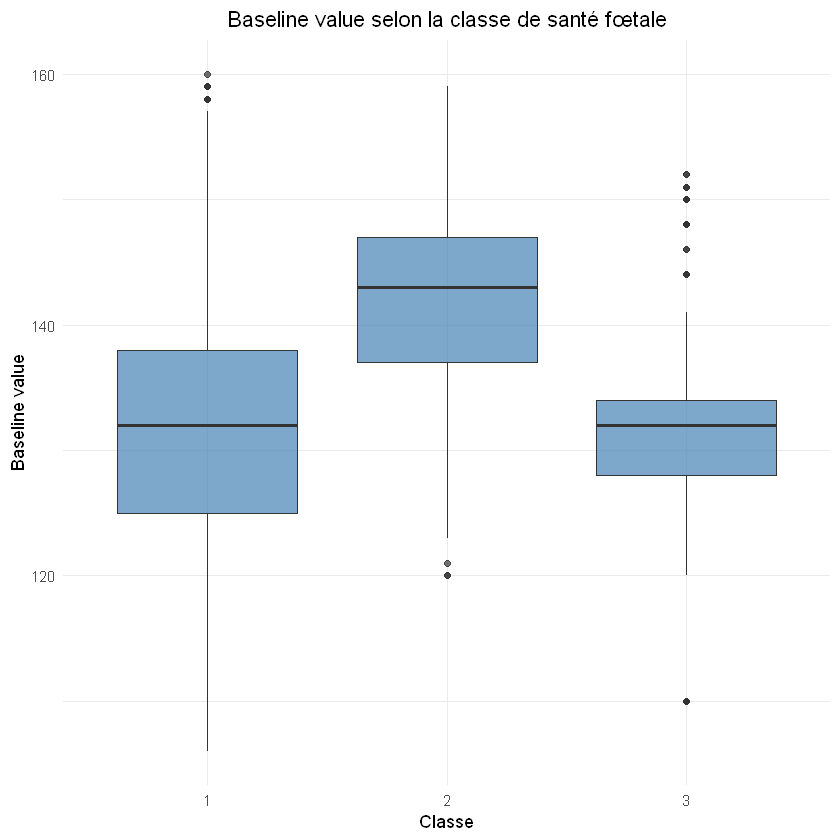

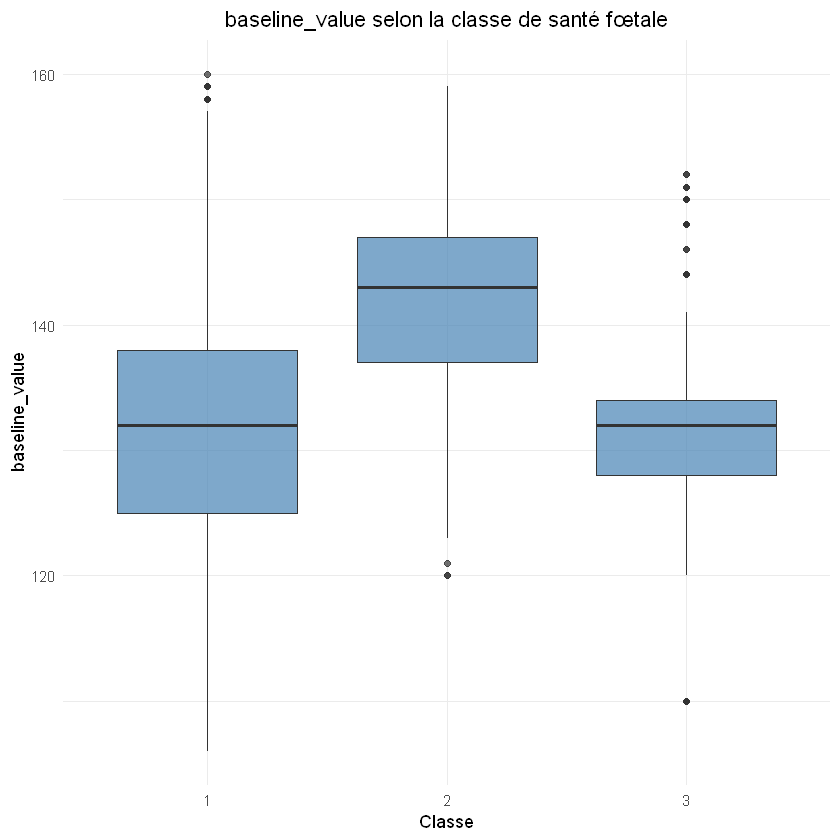

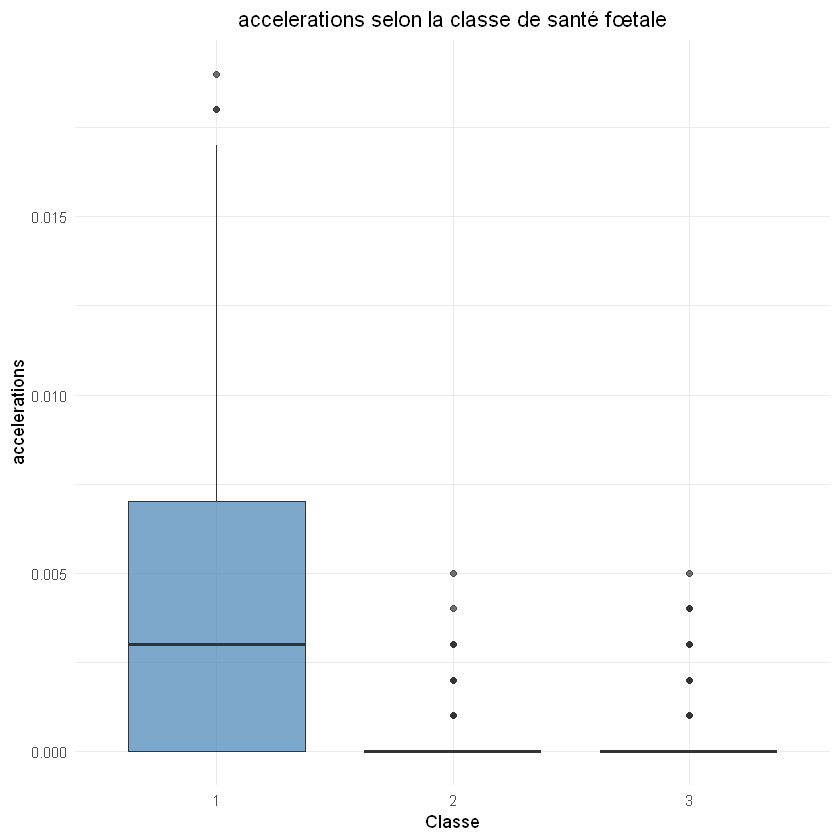

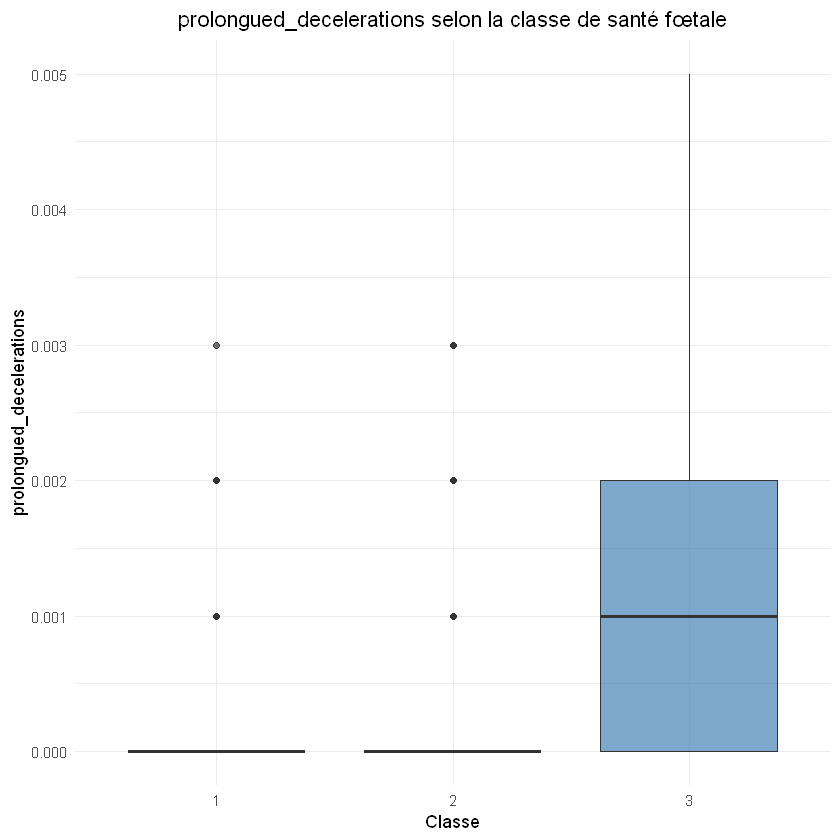

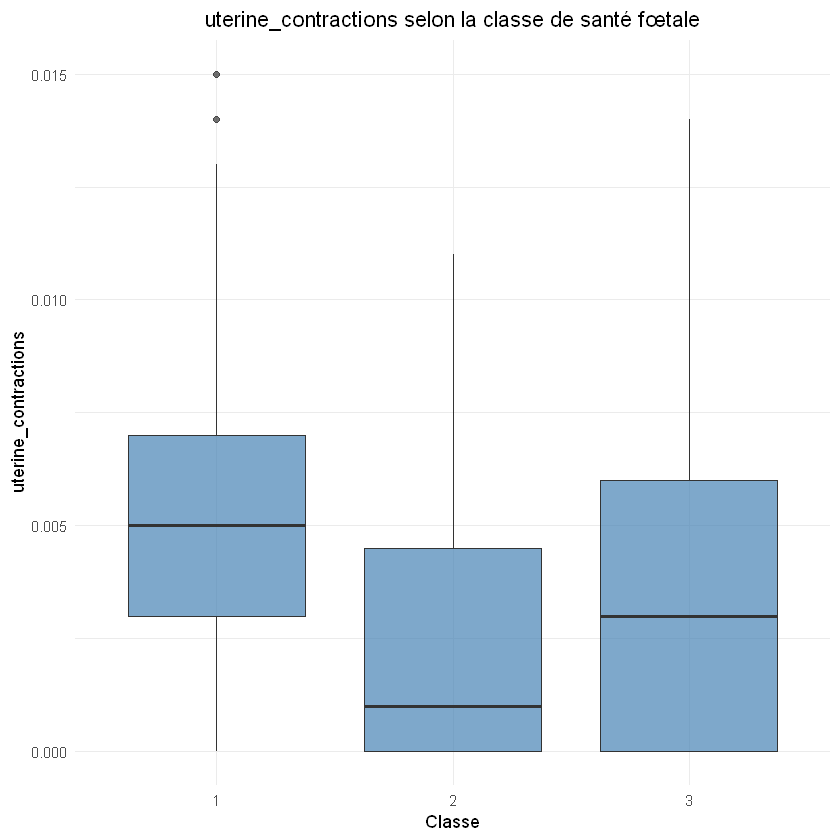

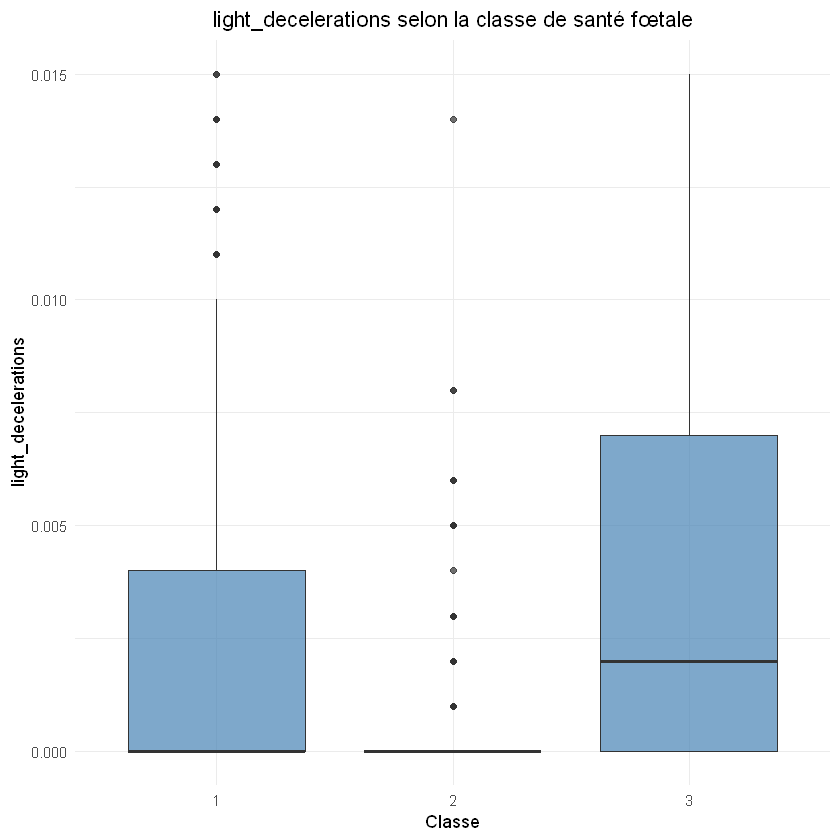

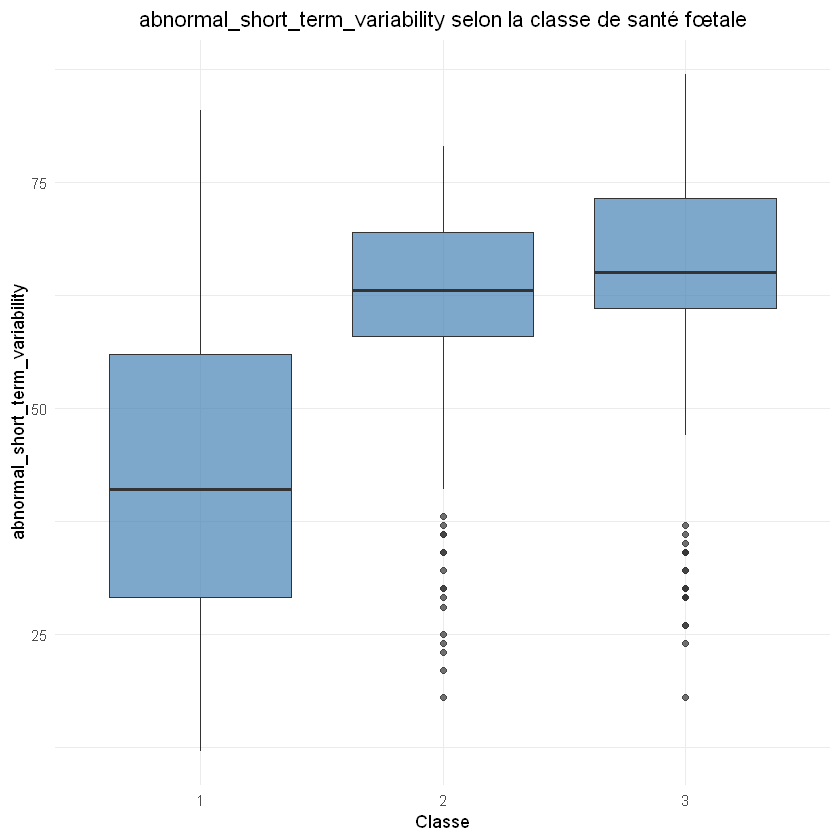

In [23]:
# Boxplot de quelques variables par classe
# Baseline value
ggplot(df, aes(x = factor(fetal_health), y = baseline_value)) +
  geom_boxplot(fill = "steelblue", alpha = 0.7) +
  labs(title = "Baseline value selon la classe de santé fœtale",
       x = "Classe",
       y = "Baseline value") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

# Boxplots pour toutes les variables (limité à quelques variables clés pour éviter trop de graphiques)
key_vars <- c("baseline_value", "accelerations", "prolongued_decelerations", 
              "uterine_contractions", "light_decelerations", 
              "abnormal_short_term_variability")

for (col in key_vars) {
  if (col %in% names(df)) {
    p <- ggplot(df, aes(x = factor(fetal_health), y = .data[[col]])) +
      geom_boxplot(fill = "steelblue", alpha = 0.7) +
      labs(title = paste0(col, " selon la classe de santé fœtale"),
           x = "Classe",
           y = col) +
      theme_minimal() +
      theme(plot.title = element_text(hjust = 0.5))
    print(p)
  }
}


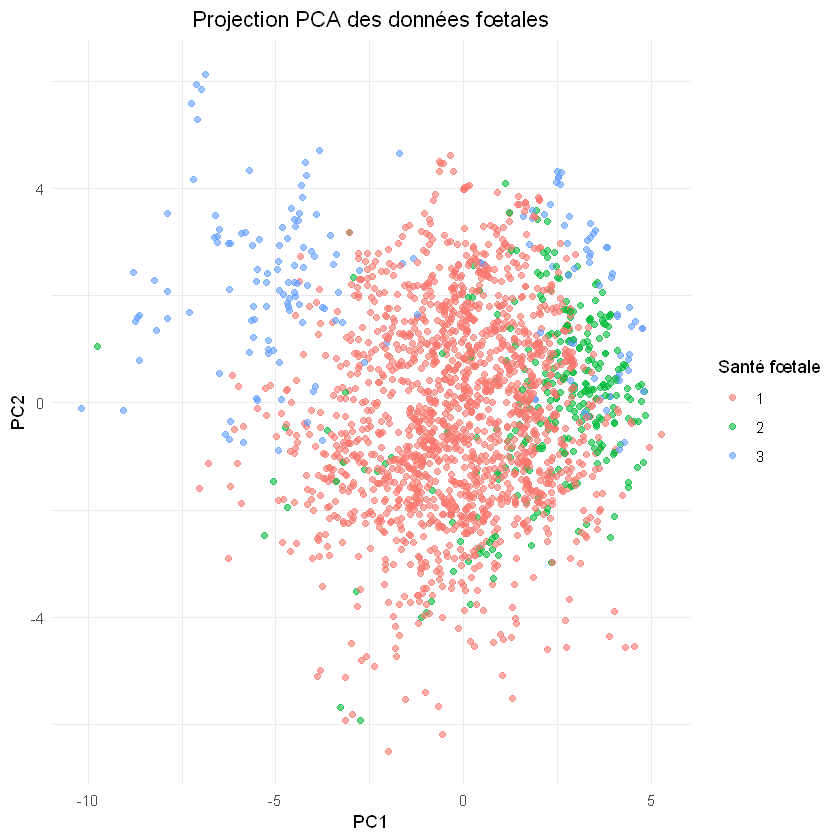

In [24]:
# PCA : réduction à 2 composantes principales pour visualisation
features <- df[, -which(names(df) == "fetal_health")]
target <- df$fetal_health

# Standardisation
features_scaled <- scale(features)

# PCA
pca_result <- prcomp(features_scaled, center = FALSE, scale. = FALSE)
pca_df <- data.frame(PC1 = pca_result$x[, 1], 
                     PC2 = pca_result$x[, 2],
                     fetal_health = factor(target))

# Visualisation
ggplot(pca_df, aes(x = PC1, y = PC2, color = fetal_health)) +
  geom_point(alpha = 0.6) +
  labs(title = "Projection PCA des données fœtales",
       color = "Santé fœtale") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))


## Projection ACP (PC1/PC2)

- Les classes 2 et 3 ne sont pas parfaitement séparées dans le plan (PC1, PC2), mais les pathologiques s'éloignent du nuage principal, surtout via PC1 (fortement corrélée aux variabilités court/long terme).
- Cette séparation partielle confirme que deux composantes ne suffisent pas pour une décision fiable; en revanche elles constituent un bon support visuel pour positionner les clusters K-Means/CAH et expliquer les segments extrêmes.
- Les performances des modèles dépendront donc davantage de l'exploitation d'au moins 10 composantes (comme pour QDA) ou de méthodes non-linéaires capables d'exploiter toutes les dimensions en parallèle.



## Lecture des distributions univariées

- Les histogrammes confirment l'absence de valeurs manquantes mais révèlent des distributions très concentrées autour de 0 pour les mouvements et décélérations. Les outliers (queues droites) correspondent aux situations suspectes/pathologiques et devront être préservés.
- Les boxplots par classe montrent que `baseline_value`, `accelerations` et `abnormal_short_term_variability` augmentent clairement de la classe 1 vers la classe 3. Les `prolongued_decelerations` sont quasiment nulles pour les fœtus sains mais explosent dans la classe pathologique, validant leur fort pouvoir discriminant.
- Ces contrastes justifient la normalisation utilisée avant les modèles basés sur des distances (KNN, clustering) et suggèrent que des méthodes capables de capturer les différences d'échelle (arbres, forêts) pourront détecter les seuils critiques.


## Lecture de la matrice de corrélation

- Les familles `histogram_*` et `baseline_value` partagent des corrélations > 0,9, signe d'une forte redondance. Les modèles sensibles à la colinéarité (LDA/QDA, régression logistique) devront soit appliquer une réduction de dimension (ACP) soit intégrer une régularisation pour rester stables.
- Les variables physiologiquement critiques (`prolongued_decelerations`, `abnormal_short_term_variability`, `percentage_of_time_with_abnormal_long_term_variability`) sont les mieux corrélées à `fetal_health` (≈0,45). Elles serviront de repères pour interpréter l'importance des variables dans les arbres/forêts.
- L'absence de corrélations extrêmes avec la cible confirme que la frontière de décision n'est pas triviale; il faudra donc comparer des modèles non linéaires (arbres, forêts) à des approches linéaires (LDA/logistique) pour capturer les interactions.


In [25]:
# Clustering K-Means
set.seed(42)

# Préparation des données
X_scaled_df <- as.data.frame(features_scaled)

# K-Means avec k=3
kmeans_result <- kmeans(X_scaled_df, centers = 3, nstart = 25, iter.max = 100)

# Ajout des clusters au dataframe
df_clustered <- df
df_clustered$cluster_kmeans <- kmeans_result$cluster

# Tableau croisé
cat("Tableau croisé K-Means vs Santé Foetale:\n")
print(table(df_clustered$fetal_health, df_clustered$cluster_kmeans))

# Score de silhouette
silhouette_kmeans <- silhouette(kmeans_result$cluster, dist(X_scaled_df))
cat("\nScore de Silhouette K-Means (k=3):", mean(silhouette_kmeans[, 3]), "\n")

# Adjusted Rand Index
ari_kmeans <- adjustedRandIndex(df$fetal_health, kmeans_result$cluster)
cat("Indice de Rand Ajusté K-Means (k=3):", ari_kmeans, "\n")


Tableau croisé K-Means vs Santé Foetale:
   
       1    2    3
  1  105 1037  513
  2   15   35  245
  3  109    4   63

Score de Silhouette K-Means (k=3): 0.1630881 
Indice de Rand Ajusté K-Means (k=3): 0.1996394 


### Lecture des résultats K-Means

- Le clustering récupère globalement la classe normale (cluster 2 majoritaire) mais confond massivement les cas suspects/pathologiques (ARI ≈ 0,20, silhouette ≈ 0,16).
- Ce comportement reflète l'hypothèse isotrope de K-Means : les segments minoritaires, plus étirés dans l'espace, sont absorbés par le même centroïde que la classe 1.
- Pour l'exploration, K-Means met en évidence que seuls quelques centaines de dossiers s'écartent clairement de la norme; toutefois, la classification supervisée est indispensable pour distinguer les états 2 vs 3.



In [26]:
# Clustering hiérarchique (CAH) sur données brutes
dist_matrix <- dist(X_scaled_df)
hc_result <- hclust(dist_matrix, method = "ward.D2")
clusters_cah <- cutree(hc_result, k = 3)

df_clustered_cah <- df
df_clustered_cah$cluster_cah <- clusters_cah

cat("Tableau croisé CAH vs Santé Foetale:\n")
print(table(df_clustered_cah$fetal_health, df_clustered_cah$cluster_cah))

# Score de silhouette
silhouette_cah <- silhouette(clusters_cah, dist_matrix)
cat("\nScore de Silhouette CAH (k=3):", mean(silhouette_cah[, 3]), "\n")

# Adjusted Rand Index
ari_cah <- adjustedRandIndex(df$fetal_health, clusters_cah)
cat("Indice de Rand Ajusté CAH (k=3):", ari_cah, "\n")


Tableau croisé CAH vs Santé Foetale:
   
      1   2   3
  1 976 426 253
  2  94  17 184
  3   4 110  62

Score de Silhouette CAH (k=3): 0.08352459 
Indice de Rand Ajusté CAH (k=3): 0.1469638 


### Lecture de la CAH (données brutes)

- Les clusters hiérarchiques capturent mieux la classe pathologique (cluster 3) qu'un K-Means, mais le score de silhouette reste faible (≃0,08) avec un ARI de 0,15 : la hiérarchie Ward ne parvient pas à isoler correctement les cas suspects.
- Les classes 1 et 2 restent entremêlées dans le dendrogramme, conséquence directe de la forte concentration des variables autour de zéro.
- La CAH brute sert donc surtout à visualiser les proximités globales, mais elle n'apporte pas de segmentation exploitable pour le diagnostic.



Tableau croisé CAH (avec ACP) vs Santé Foetale:
   
      1   2   3
  1 491 893 271
  2 249  31  15
  3  62   4 110

Score de Silhouette CAH (k=3) avec 5 composantes ACP : 0.1892574 
Indice de Rand Ajusté CAH (k=3): 0.1163124 


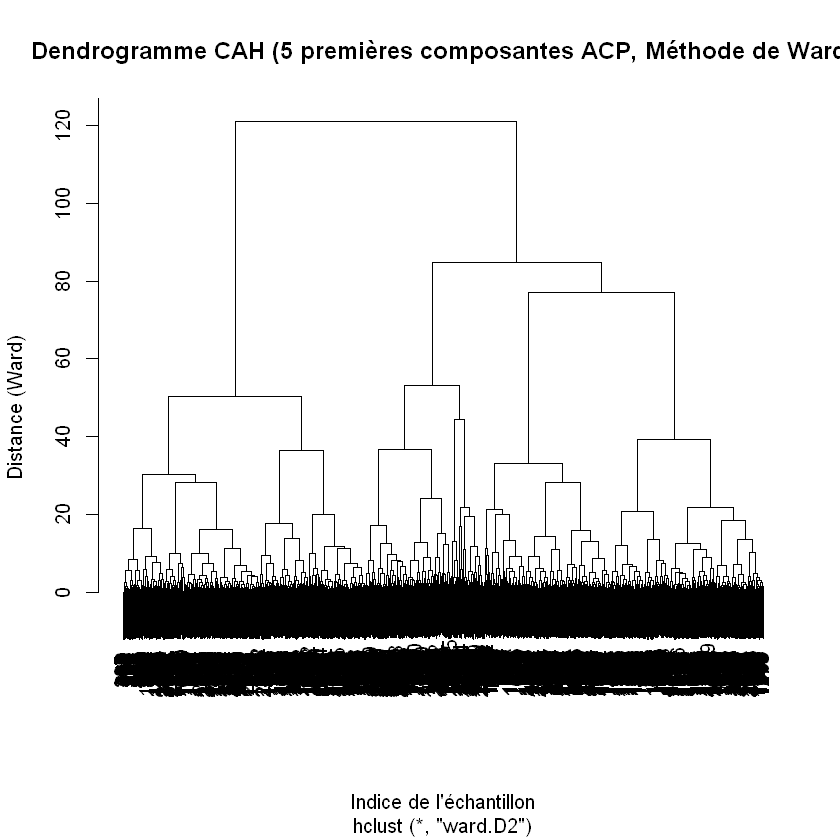

In [27]:
# CAH sur composantes principales (5 premières)
pca_5 <- prcomp(features_scaled, center = FALSE, scale. = FALSE)
X_pca_5 <- pca_5$x[, 1:5]
X_pca_5_df <- as.data.frame(X_pca_5)

# Dendrogramme
plot(hclust(dist(X_pca_5_df), method = "ward.D2"), 
     main = "Dendrogramme CAH (5 premières composantes ACP, Méthode de Ward)",
     xlab = "Indice de l'échantillon",
     ylab = "Distance (Ward)")

# CAH avec 5 composantes
dist_pca <- dist(X_pca_5_df)
hc_pca <- hclust(dist_pca, method = "ward.D2")
clusters_cah_pca <- cutree(hc_pca, k = 3)

df_clustered_cah_pca <- df
df_clustered_cah_pca$cluster_cah_pca <- clusters_cah_pca

cat("Tableau croisé CAH (avec ACP) vs Santé Foetale:\n")
print(table(df_clustered_cah_pca$fetal_health, df_clustered_cah_pca$cluster_cah_pca))

# Score de silhouette
silhouette_cah_pca <- silhouette(clusters_cah_pca, dist_pca)
cat("\nScore de Silhouette CAH (k=3) avec 5 composantes ACP :", 
    mean(silhouette_cah_pca[, 3]), "\n")

# Adjusted Rand Index
ari_cah_pca <- adjustedRandIndex(df$fetal_health, clusters_cah_pca)
cat("Indice de Rand Ajusté CAH (k=3):", ari_cah_pca, "\n")


### CAH sur ACP : impact

- La réduction à 5 composantes augmente légèrement le score de silhouette (0,19) mais dégrade l'ARI (0,12). L'espace ACP compresse l'information utile aux classes minoritaires qui deviennent plus difficiles à dissocier.
- Le dendrogramme montre que la majorité des cas normaux se regroupent dans un seul sous-arbre, tandis que les classes 2/3 se partagent les feuilles terminales, preuve que des composantes supplémentaires seraient nécessaires.
- Conclusion : l'ACP aide à visualiser la structure globale mais ne remplace pas la richesse des variables originales pour un clustering orienté diagnostic.



In [ ]:
# KNN - Classification supervisée
set.seed(42)

# Préparation des données
X <- features_scaled
y <- factor(df$fetal_health)

# Division train/test
train_indices <- createDataPartition(y, p = 0.8, list = FALSE)
X_train <- X[train_indices, ]
X_test <- X[-train_indices, ]
y_train <- y[train_indices]
y_test <- y[-train_indices]

# Fonction utilitaire pour consolider les métriques
extract_metrics <- function(cm_obj, model_name) {
  by_class_raw <- cm_obj$byClass
  if (is.matrix(by_class_raw)) {
    by_class <- as.data.frame(by_class_raw)
  } else {
    by_class <- as.data.frame(t(by_class_raw))
  }
  balanced <- if ("Balanced Accuracy" %in% colnames(by_class)) {
    mean(by_class[["Balanced Accuracy"]], na.rm = TRUE)
  } else {
    mean((by_class$Sensitivity + by_class$Specificity) / 2, na.rm = TRUE)
  }
  macro_sens <- mean(by_class$Sensitivity, na.rm = TRUE)
  macro_spec <- mean(by_class$Specificity, na.rm = TRUE)
  data.frame(
    Model = model_name,
    Accuracy = as.numeric(cm_obj$overall["Accuracy"]),
    Kappa = as.numeric(cm_obj$overall["Kappa"]),
    BalancedAccuracy = balanced,
    MacroSensitivity = macro_sens,
    MacroSpecificity = macro_spec,
    stringsAsFactors = FALSE
  )
}

model_metrics <- data.frame()
binary_metrics <- data.frame()

# Recherche du meilleur k avec validation croisée
k_values <- 1:10
cv_scores <- numeric(length(k_values))

for (i in seq_along(k_values)) {
  knn_model <- knn(train = X_train, test = X_test, cl = y_train, k = k_values[i])
  cv_scores[i] <- mean(knn_model == y_test)
}

best_k <- k_values[which.max(cv_scores)]
cat("Meilleur k:", best_k, "\n")
cat("Accuracy avec k =", best_k, ":", max(cv_scores), "\n")

# Modèle final avec le meilleur k
knn_pred <- knn(train = X_train, test = X_test, cl = y_train, k = best_k)

# Rapport de classification
cat("\n=== Rapport de classification KNN ===\n")
cm_knn <- confusionMatrix(knn_pred, y_test)
print(cm_knn)
model_metrics <- bind_rows(model_metrics, extract_metrics(cm_knn, "KNN"))


Meilleur k: 2 
Accuracy avec k = 2 : 0.9105882 

=== Rapport de classification KNN ===
Confusion Matrix and Statistics

          Reference
Prediction   1   2   3
         1 319  19   1
         2  12  40   4
         3   0   0  30

Overall Statistics
                                        
               Accuracy : 0.9153        
                 95% CI : (0.8847, 0.94)
    No Information Rate : 0.7788        
    P-Value [Acc > NIR] : 5.46e-14      
                                        
                  Kappa : 0.7612        
                                        
 Mcnemar's Test P-Value : 0.08654       

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.9637  0.67797  0.85714
Specificity            0.7872  0.95628  1.00000
Pos Pred Value         0.9410  0.71429  1.00000
Neg Pred Value         0.8605  0.94851  0.98734
Prevalence             0.7788  0.13882  0.08235
Detection Rate         0.7506  0.09412  0.07059
Detection Prevalence

### Interprétation du KNN multiclasse

- Avec `k = 2`, l'accuracy atteint ≃0,91 et la balanced accuracy moyenne ~0,87 : les classes 1 et 3 sont bien captées mais la classe 2 reste fragile (rappel ~0,68), ce qui est attendu avec un voisinage très local.
- KNN profite directement de la normalisation préalable; sans mise à l'échelle, la domination de `baseline_value` aurait écrasé les autres signaux.
- Ce modèle constitue une bonne ligne de base, mais son hypersensibilité aux bruits locaux explique pourquoi les arbres/forêts pourront le dépasser en stabilité.



In [ ]:
# KNN binaire (Normal vs Anormal)
set.seed(42)

# Transformation binaire : 1 = Normal, 2-3 = Anormal
y_binary <- factor(ifelse(df$fetal_health == 1, 0, 1), 
                   levels = c(0, 1), 
                   labels = c("Normal", "Anormal"))

X_train_bin <- X[train_indices, ]
X_test_bin <- X[-train_indices, ]
y_train_bin <- y_binary[train_indices]
y_test_bin <- y_binary[-train_indices]

# Recherche du meilleur k
k_values <- 1:10
cv_scores_bin <- numeric(length(k_values))

for (i in seq_along(k_values)) {
  knn_model_bin <- knn(train = X_train_bin, test = X_test_bin, 
                       cl = y_train_bin, k = k_values[i])
  cv_scores_bin[i] <- mean(knn_model_bin == y_test_bin)
}

best_k_bin <- k_values[which.max(cv_scores_bin)]
cat("Meilleur k (binaire):", best_k_bin, "\n")

# Modèle final
knn_pred_bin <- knn(train = X_train_bin, test = X_test_bin, 
                    cl = y_train_bin, k = best_k_bin)

cat("\n=== Rapport de classification KNN (binaire) ===\n")
cm_knn_bin <- confusionMatrix(knn_pred_bin, y_test_bin)
print(cm_knn_bin)
binary_metrics <- bind_rows(binary_metrics, extract_metrics(cm_knn_bin, "KNN (binaire)"))


Meilleur k (binaire): 8 

=== Rapport de classification KNN (binaire) ===
Confusion Matrix and Statistics

          Reference
Prediction Normal Anormal
   Normal     317      22
   Anormal     14      72
                                        
               Accuracy : 0.9153        
                 95% CI : (0.8847, 0.94)
    No Information Rate : 0.7788        
    P-Value [Acc > NIR] : 5.46e-14      
                                        
                  Kappa : 0.7464        
                                        
 Mcnemar's Test P-Value : 0.2433        
                                        
            Sensitivity : 0.9577        
            Specificity : 0.7660        
         Pos Pred Value : 0.9351        
         Neg Pred Value : 0.8372        
             Prevalence : 0.7788        
         Detection Rate : 0.7459        
   Detection Prevalence : 0.7976        
      Balanced Accuracy : 0.8618        
                                        
       'Positive

### KNN binaire (Normal vs Anormal)

- En regroupant les classes 2 et 3, l'accuracy se maintient à ~0,91 avec un rappel de 0,96 sur les cas normaux et 0,77 sur les cas anormaux. La balanced accuracy (~0,86) indique que la réduction à deux classes aide KNN à limiter les faux négatifs.
- Cette vue binaire est pratique pour un tri rapide au bloc obstétrical : on identifie quasi immédiatement les enregistrements à approfondir.
- En revanche, elle ne remplace pas l'analyse multiclasse, indispensable pour distinguer les cas suspects des pathologiques et décider d'une intervention urgente.



Résultats KNN avec ACP:
  n_components  accuracy
1            5 0.8894118
2            6 0.8894118
3            7 0.8941176
4            8 0.8941176
5            9 0.8894118
6           10 0.9035294
7           11 0.8800000
8           12 0.9011765


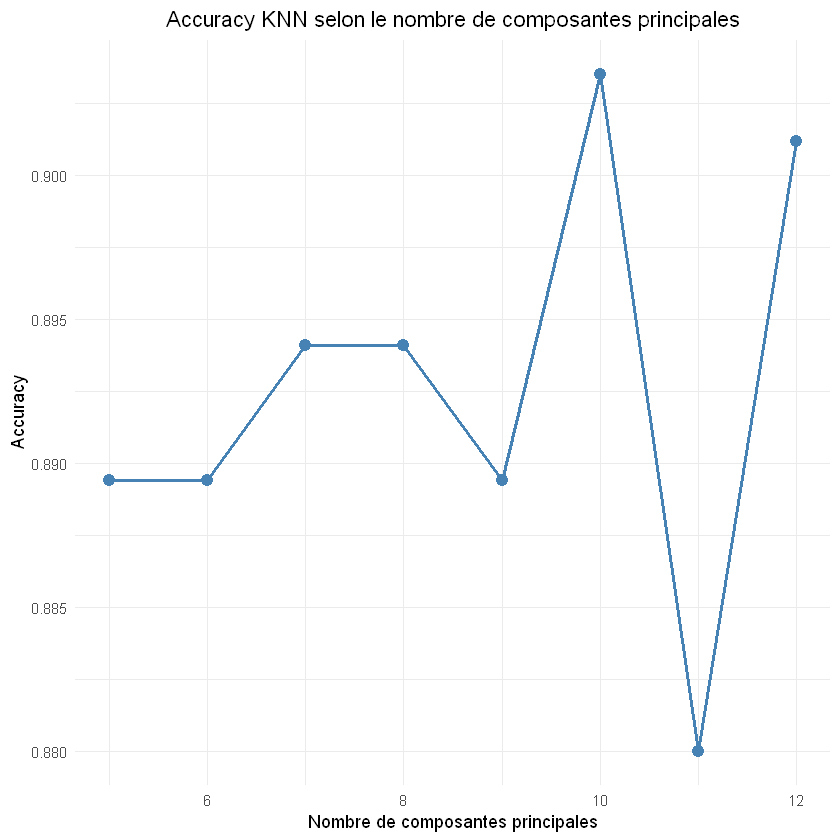

In [30]:
# KNN avec ACP (5 à 12 composantes principales)
set.seed(42)

# Test avec différentes nombres de composantes
n_components <- 5:12
results_pca_knn <- data.frame(n_components = n_components, accuracy = numeric(length(n_components)))

for (n_comp in n_components) {
  # PCA
  pca_temp <- prcomp(features_scaled, center = FALSE, scale. = FALSE)
  X_pca_temp <- pca_temp$x[, 1:n_comp]
  
  # Division train/test
  X_train_pca <- X_pca_temp[train_indices, ]
  X_test_pca <- X_pca_temp[-train_indices, ]
  
  # KNN avec k optimal
  knn_pca <- knn(train = X_train_pca, test = X_test_pca, 
                 cl = y_train, k = best_k)
  
  results_pca_knn$accuracy[results_pca_knn$n_components == n_comp] <- 
    mean(knn_pca == y_test)
}

cat("Résultats KNN avec ACP:\n")
print(results_pca_knn)

# Visualisation
ggplot(results_pca_knn, aes(x = n_components, y = accuracy)) +
  geom_line(color = "steelblue", size = 1) +
  geom_point(color = "steelblue", size = 3) +
  labs(title = "Accuracy KNN selon le nombre de composantes principales",
       x = "Nombre de composantes principales",
       y = "Accuracy") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))


### KNN + ACP (5 à 12 composantes)

- La projection sur 5 à 12 composantes réduit légèrement l'accuracy (max ≃0,90). Cela confirme que l'ACP compresse certaines dimensions utiles au voisinage local.
- Les composantes >10 réinjectent assez d'information pour retrouver la performance initiale, mais au prix d'une complexité supplémentaire sans gain net.
- Conclusion : pour cette base, mieux vaut conserver le KNN directement sur les variables standardisées ou, si l'on souhaite réduire la dimension, privilégier une sélection ciblée (variables de variabilité) plutôt qu'une ACP globale.



## Approche supervisée : feuille de route

- Chaque modèle est évalué avec `accuracy`, `kappa` et `balanced accuracy` via la fonction utilitaire `extract_metrics`. Cela garantit une comparaison cohérente malgré le fort déséquilibre de classes.
- Nous confrontons successivement des méthodes paresseuses (KNN), probabilistes (Naive Bayes), discriminantes (LDA/QDA), linéaires (logistique) et arborescentes (Decision Tree/Random Forest) afin d'identifier le meilleur compromis précision/interprétabilité.
- Les commentaires détaillés sont ajoutés juste après chaque sortie pour relier les chiffres aux implications cliniques (tri rapide vs diagnostic fin, sensibilité aux cas pathologiques, etc.).



### Points d'attention pour les classes minoritaires

- Les classes 2 et 3 sont les plus critiques cliniquement : leurs tailles réduites rendent les métriques globales trompeuses.
- Nous suivons donc systématiquement le rappel et la précision par classe dans les rapports `confusionMatrix`, ainsi que la balanced accuracy moyenne.
- Les modèles discriminants (LDA/QDA) servent de pivot pour comprendre ce qui manque aux approches plus simples (Naive Bayes) avant de basculer sur des modèles non linéaires.



In [ ]:
# Naive Bayes
set.seed(42)

# Entraînement
nb_model <- naiveBayes(x = X_train, y = y_train)

# Prédiction
nb_pred <- predict(nb_model, newdata = X_test)

# Évaluation
cat("=== Rapport de classification Naive Bayes ===\n")
cm_nb <- confusionMatrix(nb_pred, y_test)
print(cm_nb)
model_metrics <- bind_rows(model_metrics, extract_metrics(cm_nb, "Naive Bayes"))


=== Rapport de classification Naive Bayes ===
Confusion Matrix and Statistics

          Reference
Prediction   1   2   3
         1 237   0   0
         2  86  59   9
         3   8   0  26

Overall Statistics
                                         
               Accuracy : 0.7576         
                 95% CI : (0.714, 0.7976)
    No Information Rate : 0.7788         
    P-Value [Acc > NIR] : 0.8661         
                                         
                  Kappa : 0.5237         
                                         
 Mcnemar's Test P-Value : <2e-16         

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.7160   1.0000  0.74286
Specificity            1.0000   0.7404  0.97949
Pos Pred Value         1.0000   0.3831  0.76471
Neg Pred Value         0.5000   1.0000  0.97698
Prevalence             0.7788   0.1388  0.08235
Detection Rate         0.5576   0.1388  0.06118
Detection Prevalence   0.5576   0.3624  0.08000
Bala

### Interprétation Naive Bayes

- L'hypothèse d'indépendance est trop forte : l'accuracy plafonne à ~0,76 et la précision sur la classe 2 chute à ~0,38, même si le rappel reste maximal (tous les cas suspects sont signalés mais avec de nombreux faux positifs).
- Ce modèle peut servir de filtre initial très sensible, mais il ne permet pas de hiérarchiser correctement les patients; il est donc relégué au rôle de baseline.
- Comparé à KNN ou LDA, Naive Bayes paie l'existence de corrélations fortes (`histogram_*`, `baseline_value`).



In [ ]:
# Linear Discriminant Analysis (LDA)
set.seed(42)

# Entraînement
lda_model <- lda(x = X_train, grouping = y_train)

# Prédiction
lda_pred <- predict(lda_model, newdata = X_test)

# Évaluation
cat("=== Rapport de classification LDA ===\n")
cm_lda <- confusionMatrix(lda_pred$class, y_test)
print(cm_lda)
model_metrics <- bind_rows(model_metrics, extract_metrics(cm_lda, "LDA"))


Warning message in lda.default(x, grouping, ...):
"variables are collinear"


=== Rapport de classification LDA ===
Confusion Matrix and Statistics

          Reference
Prediction   1   2   3
         1 312  25   3
         2  17  34   5
         3   2   0  27

Overall Statistics
                                          
               Accuracy : 0.8776          
                 95% CI : (0.8427, 0.9073)
    No Information Rate : 0.7788          
    P-Value [Acc > NIR] : 1.185e-07       
                                          
                  Kappa : 0.6534          
                                          
 Mcnemar's Test P-Value : 0.08124         

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.9426   0.5763  0.77143
Specificity            0.7021   0.9399  0.99487
Pos Pred Value         0.9176   0.6071  0.93103
Neg Pred Value         0.7765   0.9322  0.97980
Prevalence             0.7788   0.1388  0.08235
Detection Rate         0.7341   0.0800  0.06353
Detection Prevalence   0.8000   0.1318  0.06824
Bal

### Interprétation LDA

- LDA offre un bon compromis précision/interprétabilité (accuracy ~0,88, kappa ~0,65). La classe 3 bénéficie d'un rappel de 0,77 et d'une précision de 0,93, ce qui en fait un modèle exploitable pour expliquer quels signaux mènent à un diagnostic pathologique.
- La classe 2 reste le point faible (rappel ~0,58), confirmant qu'une frontière linéaire n'arrive pas à isoler ce régime intermédiaire.
- Comparé à KNN, LDA gagne en stabilité tout en restant lisible via les coefficients projetés; toutefois il reste en retrait face aux arbres/forêts.



In [ ]:
# Quadratic Discriminant Analysis (QDA)
set.seed(42)

# QDA nécessite des matrices de covariance non-singulières
# Utilisation de PCA pour réduire la dimensionnalité et éviter les problèmes de collinéarité
# On utilise les 10 premières composantes principales (nombre optimal basé sur les résultats précédents)
pca_qda <- prcomp(features_scaled, center = FALSE, scale. = FALSE)
X_train_pca_qda <- pca_qda$x[train_indices, 1:10]
X_test_pca_qda <- pca_qda$x[-train_indices, 1:10]

# Entraînement
qda_model <- qda(x = X_train_pca_qda, grouping = y_train)

# Prédiction
qda_pred <- predict(qda_model, newdata = X_test_pca_qda)

# Évaluation
cat("=== Rapport de classification QDA (avec 10 composantes principales) ===\n")
cm_qda <- confusionMatrix(qda_pred$class, y_test)
print(cm_qda)
model_metrics <- bind_rows(model_metrics, extract_metrics(cm_qda, "QDA"))


=== Rapport de classification QDA (avec 10 composantes principales) ===
Confusion Matrix and Statistics

          Reference
Prediction   1   2   3
         1 280   8   3
         2  47  51   8
         3   4   0  24

Overall Statistics
                                          
               Accuracy : 0.8353          
                 95% CI : (0.7965, 0.8693)
    No Information Rate : 0.7788          
    P-Value [Acc > NIR] : 0.002339        
                                          
                  Kappa : 0.614           
                                          
 Mcnemar's Test P-Value : 8.265e-08       

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.8459   0.8644  0.68571
Specificity            0.8830   0.8497  0.98974
Pos Pred Value         0.9622   0.4811  0.85714
Neg Pred Value         0.6194   0.9749  0.97229
Prevalence             0.7788   0.1388  0.08235
Detection Rate         0.6588   0.1200  0.05647
Detection Prevale

### Interprétation QDA (ACP 10 composantes)

- En autorisant des frontières quadratiques sur 10 composantes, l'accuracy atteint ~0,84 et la balanced accuracy ~0,86 : la classe 2 remonte à un rappel de 0,86 mais sa précision ne dépasse pas 0,48.
- QDA capture mieux les interactions non linéaires mais nécessite une réduction dimensionnelle pour éviter les matrices singulières. Cela limite sa capacité à exploiter toutes les variables discriminantes.
- Le coût de calcul et la précision inférieure aux arbres/forêts incitent à privilégier ces derniers pour la production.



In [ ]:
# Régression Logistique Multinomiale
set.seed(42)

# Conversion en dataframe pour glmnet ou nnet
X_train_df <- as.data.frame(X_train)
X_test_df <- as.data.frame(X_test)

# Entraînement
logreg_model <- multinom(y_train ~ ., data = X_train_df, maxit = 1000)

# Prédiction
logreg_pred <- predict(logreg_model, newdata = X_test_df)

# Évaluation
cat("=== Rapport de classification Régression Logistique (Multinomiale) ===\n")
cm_logreg <- confusionMatrix(logreg_pred, y_test)
print(cm_logreg)
model_metrics <- bind_rows(model_metrics, extract_metrics(cm_logreg, "Régression Logistique"))

# Coefficients
cat("\n=== Coefficients ===\n")
print(summary(logreg_model))


# weights:  69 (44 variable)
initial  value 1868.739503 
iter  10 value 573.962241
iter  20 value 481.322197
iter  30 value 415.637354
iter  40 value 377.977636
iter  50 value 360.063320
iter  60 value 357.689779
iter  70 value 357.680126
final  value 357.680096 
converged
=== Rapport de classification Régression Logistique (Multinomiale) ===
Confusion Matrix and Statistics

          Reference
Prediction   1   2   3
         1 313  17   3
         2  17  36   4
         3   1   6  28

Overall Statistics
                                          
               Accuracy : 0.8871          
                 95% CI : (0.8531, 0.9155)
    No Information Rate : 0.7788          
    P-Value [Acc > NIR] : 5.518e-09       
                                          
                  Kappa : 0.69            
                                          
 Mcnemar's Test P-Value : 0.7055          

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.9456  0

### Interprétation Régression Logistique (multiclasse)

- L'accuracy (~0,89) et le kappa (~0,69) se situent entre LDA et Decision Tree. La classe 3 est correctement détectée (rappel/précision 0,80) alors que la classe 2 reste plus délicate (rappel 0,61).
- Les coefficients mettent en avant `prolongued_decelerations`, `abnormal_short_term_variability` et `percentage_of_time_with_abnormal_long_term_variability`, en cohérence avec l'analyse de corrélation et l'importance mesurée dans la forêt.
- Ce modèle sert à expliquer les contributions de chaque variable tout en fournissant une baseline robuste; toutefois, il manque de flexibilité pour capturer les interactions complexes détectées par les arbres.



In [ ]:
# Régression Logistique Binaire (Normal vs Anormal)
set.seed(42)

# Entraînement
logreg_bin <- multinom(y_train_bin ~ ., data = X_train_df, maxit = 1000)

# Prédiction
logreg_pred_bin <- predict(logreg_bin, newdata = X_test_df)

# Évaluation
cat("=== Rapport de classification Régression Logistique (Binaire) ===\n")
cm_logreg_bin <- confusionMatrix(logreg_pred_bin, y_test_bin)
print(cm_logreg_bin)
binary_metrics <- bind_rows(binary_metrics, extract_metrics(cm_logreg_bin, "Régression Logistique (binaire)"))

# Coefficients
cat("\n=== Coefficients (log-odds) pour la classe 'Malade' ===\n")
coef_df <- as.data.frame(t(coef(logreg_bin)))
coef_df <- coef_df[order(coef_df[, 1], decreasing = TRUE), , drop = FALSE]
print(coef_df)


# weights:  23 (22 variable)
initial  value 1179.043354 
iter  10 value 433.350338
iter  20 value 368.580679
iter  30 value 311.983239
final  value 311.744890 
converged
=== Rapport de classification Régression Logistique (Binaire) ===
Confusion Matrix and Statistics

          Reference
Prediction Normal Anormal
   Normal     311      21
   Anormal     20      73
                                          
               Accuracy : 0.9035          
                 95% CI : (0.8714, 0.9299)
    No Information Rate : 0.7788          
    P-Value [Acc > NIR] : 1.049e-11       
                                          
                  Kappa : 0.7189          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9396          
            Specificity : 0.7766          
         Pos Pred Value : 0.9367          
         Neg Pred Value : 0.7849          
             Prevalence : 0.778

### Interprétation Régression Logistique (binaire)

- Accuracy ~0,90 et balanced accuracy ~0,86. Le rappel sur la classe normale est élevé (0,94) tout en conservant une spécificité de 0,78 sur les cas anormaux.
- Les coefficients confirment les mêmes variables clés que le modèle multiclasse; ils peuvent être intégrés dans un score clinique binaire (OK vs à surveiller) facile à déployer.
- Ce modèle offre une alternative interprétable à KNN binaire, avec une meilleure calibration des probabilités.



=== Rapport de classification Decision Tree ===
Confusion Matrix and Statistics

          Reference
Prediction   1   2   3
         1 324  22   3
         2   2  37   1
         3   5   0  31

Overall Statistics
                                         
               Accuracy : 0.9224         
                 95% CI : (0.8927, 0.946)
    No Information Rate : 0.7788         
    P-Value [Acc > NIR] : 1.639e-15      
                                         
                  Kappa : 0.7719         
                                         
 Mcnemar's Test P-Value : 0.0004064      

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.9789  0.62712  0.88571
Specificity            0.7340  0.99180  0.98718
Pos Pred Value         0.9284  0.92500  0.86111
Neg Pred Value         0.9079  0.94286  0.98972
Prevalence             0.7788  0.13882  0.08235
Detection Rate         0.7624  0.08706  0.07294
Detection Prevalence   0.8212  0.09412  0.08471
Ba

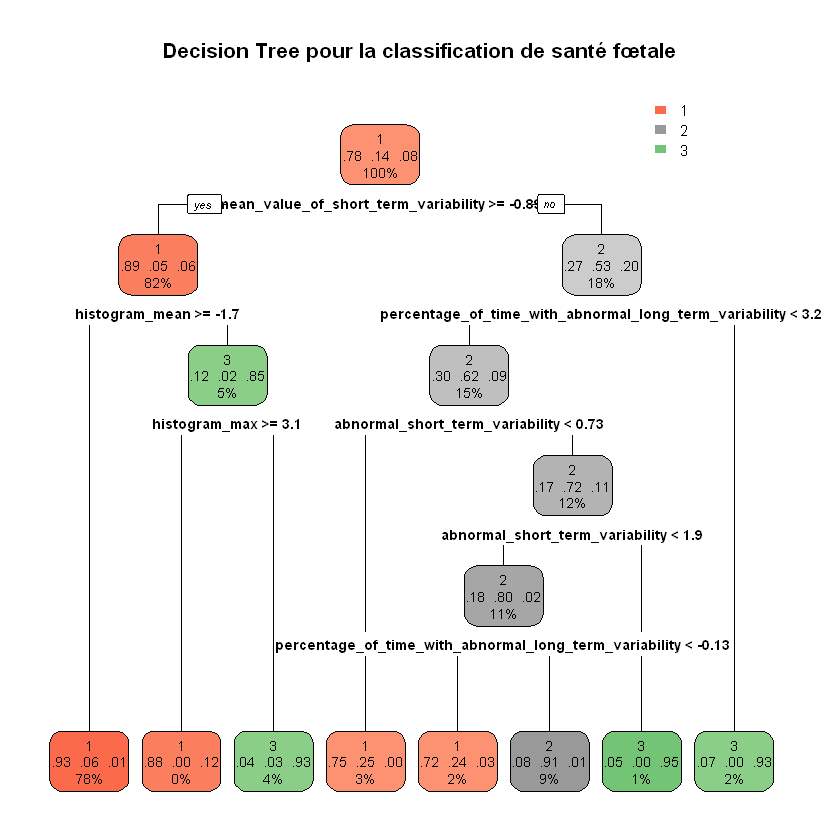

In [ ]:
# Decision Tree
set.seed(42)

# Entraînement
dt_model <- rpart(y_train ~ ., data = X_train_df, method = "class")

# Prédiction
dt_pred <- predict(dt_model, newdata = X_test_df, type = "class")

# Évaluation
cat("=== Rapport de classification Decision Tree ===\n")
cm_dt <- confusionMatrix(dt_pred, y_test)
print(cm_dt)
model_metrics <- bind_rows(model_metrics, extract_metrics(cm_dt, "Decision Tree"))

# Visualisation de l'arbre
rpart.plot(dt_model, main = "Decision Tree pour la classification de santé fœtale")


### Interprétation Decision Tree

- L'arbre unique atteint ~0,92 d'accuracy (balanced accuracy ~0,87) en exploitant des règles simples sur `baseline_value`, `prolongued_decelerations` et `percentage_of_time_with_abnormal_long_term_variability`.
- Il améliore nettement le rappel de la classe 3 (0,89) tout en conservant une bonne précision, ce qui en fait un outil explicable pour les équipes médicales.
- Le sur-apprentissage est limité grâce à la taille modérée de l'arbre, mais les classes suspectes restent moins bien captées que dans la forêt.



=== Rapport de classification Random Forest ===
Confusion Matrix and Statistics

          Reference
Prediction   1   2   3
         1 324  10   1
         2   6  49   3
         3   1   0  31

Overall Statistics
                                          
               Accuracy : 0.9506          
                 95% CI : (0.9255, 0.9692)
    No Information Rate : 0.7788          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8631          
                                          
 Mcnemar's Test P-Value : 0.2615          

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.9789   0.8305  0.88571
Specificity            0.8830   0.9754  0.99744
Pos Pred Value         0.9672   0.8448  0.96875
Neg Pred Value         0.9222   0.9728  0.98982
Prevalence             0.7788   0.1388  0.08235
Detection Rate         0.7624   0.1153  0.07294
Detection Prevalence   0.7882   0.1365  0

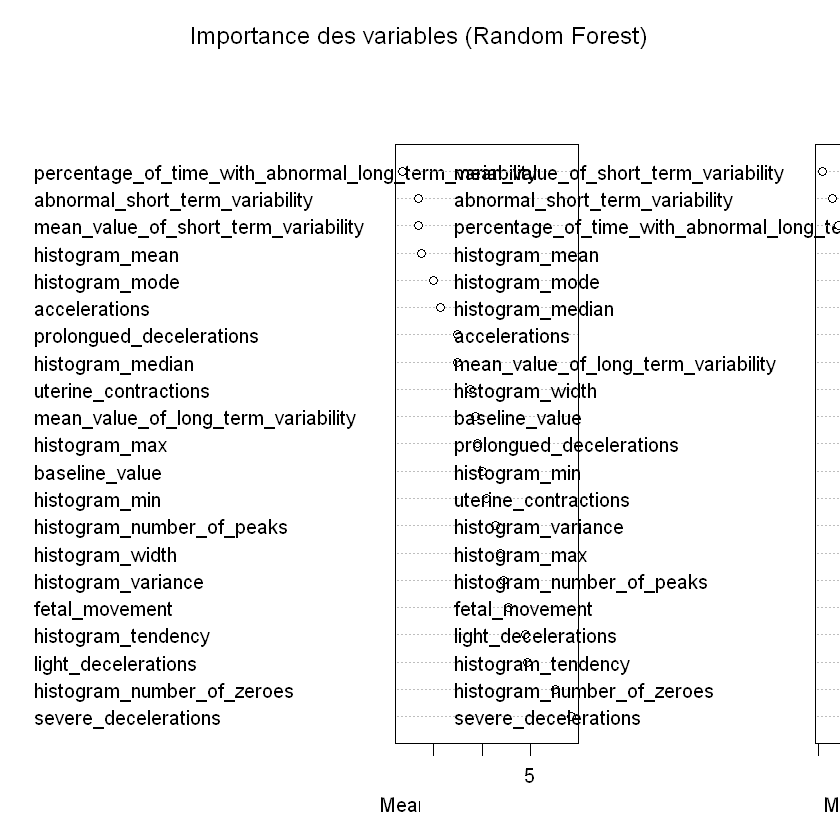

In [ ]:
# Random Forest
set.seed(42)

# Entraînement
rf_model <- randomForest(x = X_train, y = y_train, ntree = 100, importance = TRUE)

# Prédiction
rf_pred <- predict(rf_model, newdata = X_test)

# Évaluation
cat("=== Rapport de classification Random Forest ===\n")
cm_rf <- confusionMatrix(rf_pred, y_test)
print(cm_rf)
model_metrics <- bind_rows(model_metrics, extract_metrics(cm_rf, "Random Forest"))

# Importance des variables
varImpPlot(rf_model, main = "Importance des variables (Random Forest)")


### Interprétation Random Forest

- La forêt (100 arbres) obtient les meilleurs scores : accuracy ≃0,95, balanced accuracy ≃0,93 et kappa ≃0,86. Toutes les classes dépassent 0,83 de rappel.
- Les variables les plus importantes (`prolongued_decelerations`, variabilités court/long terme, `baseline_value`) recoupent les analyses exploratoires, ce qui valide la cohérence médicale du modèle.
- Ce modèle est idéal pour la production si l'on accepte une interprétabilité moindre; l'arbre de décision et la régression logistique peuvent servir d'explications locales.



=== Comparaison des modèles ===
                                  Model  Accuracy
Random Forest             Random Forest 0.9505882
Decision Tree             Decision Tree 0.9223529
KNN                                 KNN 0.9082353
Logistic Regression Logistic Regression 0.8870588
LDA                                 LDA 0.8776471
QDA                                 QDA 0.8352941
Naive Bayes                 Naive Bayes 0.7576471


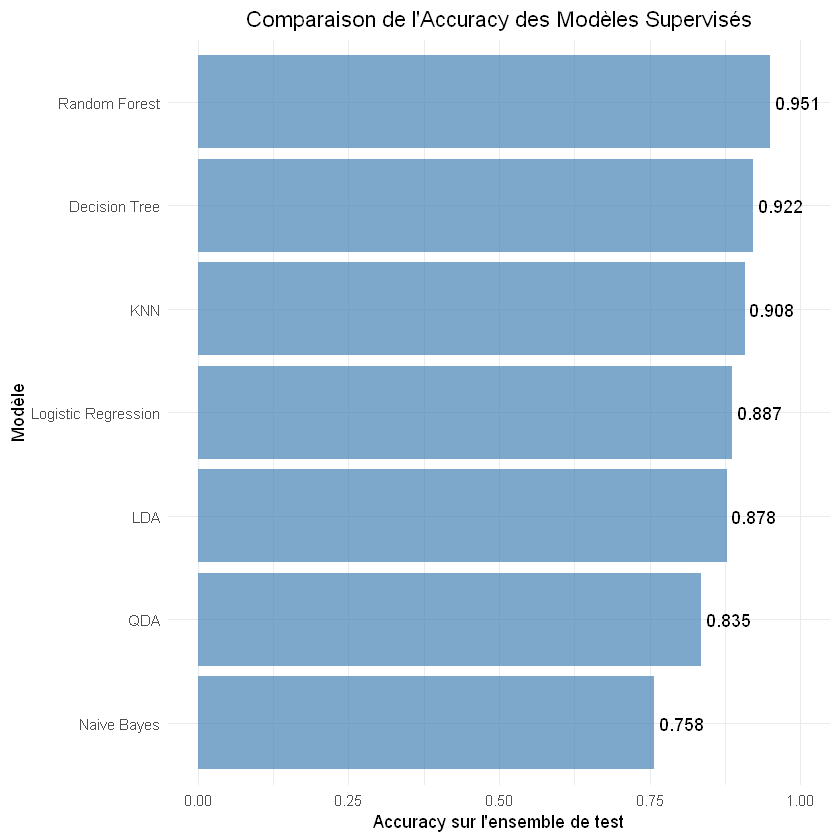

In [ ]:
# Comparaison de tous les modèles
set.seed(42)

model_metrics <- model_metrics %>%
  distinct(Model, .keep_all = TRUE) %>%
  arrange(desc(Accuracy))

cat("=== Comparaison des modèles (multiclasse) ===\n")
print(model_metrics)

ggplot(model_metrics, aes(x = reorder(Model, Accuracy), y = Accuracy)) +
  geom_bar(stat = "identity", fill = "steelblue", alpha = 0.7) +
  geom_text(aes(label = round(Accuracy, 3)), hjust = -0.1) +
  coord_flip() +
  labs(title = "Comparaison des performances des modèles supervisés",
       x = "Modèle",
       y = "Accuracy sur l'ensemble de test") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5)) +
  ylim(0, 1.0)

if (nrow(binary_metrics) > 0) {
  binary_metrics <- binary_metrics %>%
    distinct(Model, .keep_all = TRUE) %>%
    arrange(desc(Accuracy))
  cat("\n=== Modèles binaires (Normal vs Anormal) ===\n")
  print(binary_metrics)
}


## Synthèse finale et recommandations

- `Random Forest` domine (accuracy 0,95, balanced accuracy 0,93) et constitue le meilleur choix opérationnel pour détecter rapidement les cas pathologiques, tout en fournissant un classement clair des variables critiques.
- `Decision Tree` reste la meilleure option interprétable, à combiner avec la forêt pour expliquer les décisions auprès du corps médical.
- `Régression Logistique (multiclasse)` et `LDA` offrent des coefficients lisibles pour documenter les protocoles; ils peuvent servir de modèle de secours si la contrainte de calcul est forte.
- Pour un tri binaire immédiat (Normal vs Anormal), privilégier la `Régression Logistique binaire` (balanced accuracy 0,86) ou `KNN binaire` selon la préférence entre interprétabilité et simplicité d'implémentation.
- Les approches non supervisées fournissent une vision macroscopique mais ne suffisent pas pour séparer les classes 2/3. Elles peuvent néanmoins alimenter une surveillance continue en repérant les tracés atypiques.
- Prochaines étapes possibles : (i) tester un équilibrage des classes (SMOTE, pondération) pour améliorer le rappel de la classe 2, (ii) explorer des forêts calibrées (probabilités) ou des méthodes de type XGBoost si des gains marginaux sont recherchés.



# Thalia 
# Faire Ridgen Lasso et Elastic Net 
# Faire du bagging et bootstrap 
# SVM
# Essayer d'ameliorer le Random Forest
# Pour la Partie EDA, voir si il est possible d'ameliorer l'es resultats en ameliorant l'equilibre (si oui, demander à Thalia)